### We with explore our OCR output dataset

In [3]:
import pandas as pd
import json

file_path = 'training_data_pseudo_only_cleaned.json'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    print("File successfully loaded using the json library.")

    # Prepare lists to store the extracted data
    file_names = []
    file_labels = []
    pseudos = []

    # Iterate through the top-level keys (file labels)
    for file_label, files_info in data.items():
        # Iterate through the file names within each file label
        for file_name, content in files_info.items():
            file_names.append(file_name)
            file_labels.append(file_label)
            pseudos.append(content.get('pseudo')) # Use .get() to avoid KeyError if 'pseudo' is missing

    # Create the pandas DataFrame
    df = pd.DataFrame({
        'file_name': file_names,
        'file_label': file_labels,
        'pseudo_text_feature': pseudos
    })

    print("\nDataFrame successfully created:")
    print(df.head()) # Display the first few rows of the DataFrame
    print(f"\nTotal rows in DataFrame: {len(df)}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Make sure it's in the correct directory.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}. The file might be malformed.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File successfully loaded using the json library.

DataFrame successfully created:
                                        file_name  \
0  027676a0-cbfa-4b24-b0e6-3b9fee058ce4-1_pt.json   
1  032539f6-1625-4c66-b766-4fff33b08bbc-1_pt.json   
2  041d62a4-9b23-4cc2-8094-8067e7b10f85-1_pt.json   
3  044eb0cd-e7d7-45b0-bbda-473ccbb0db81-1_pt.json   
4  047600b4-3912-4b0f-9fa5-027d1bfcbb4c-1_pt.json   

                        file_label  \
0  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
1  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
2  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
3  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
4  DRIVERS_LICENCE.AUS.ACT.FULL.V1   

                                 pseudo_text_feature  
0  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  
1  DRIVER LICENCE\nACT\nAUSTRALIAN CAPITAL TERRIT...  
2  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  
3  DRIVER LICENCE\nAUSTRALIAN CAPITAL TERRITORY\n...  
4  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  

Total rows in DataFrame: 464


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [8]:
df

,file_name,file_label,pseudo_text_feature
0,027676a0-cbfa-4b24-b0e6-3b9fee058ce4-1_pt.json,DRIVERS_LICENCE.AUS.ACT.FULL.V1,DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...
1,032539f6-1625-4c66-b766-4fff33b08bbc-1_pt.json,DRIVERS_LICENCE.AUS.ACT.FULL.V1,DRIVER LICENCE\nACT\nAUSTRALIAN CAPITAL TERRIT...
2,041d62a4-9b23-4cc2-8094-8067e7b10f85-1_pt.json,DRIVERS_LICENCE.AUS.ACT.FULL.V1,DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...
3,044eb0cd-e7d7-45b0-bbda-473ccbb0db81-1_pt.json,DRIVERS_LICENCE.AUS.ACT.FULL.V1,DRIVER LICENCE\nAUSTRALIAN CAPITAL TERRITORY\n...
4,047600b4-3912-4b0f-9fa5-027d1bfcbb4c-1_pt.json,DRIVERS_LICENCE.AUS.ACT.FULL.V1,DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...
...,...,...,...
459,2f62b0f4-ee2c-4be3-9d52-68c102f25014-1_pt.json,DRIVERS_LICENCE.AUS.WA.LEARNER.V1,THE\nNT OF\nWEST\nALIA\nAS\nBRADLEY YOUNG BEAS...
460,3af727e7-2636-4f32-9066-9441af436607-1_pt.json,DRIVERS_LICENCE.AUS.WA.LEARNER.V1,LEARNER'S PERMIT WESTERN AUSTRALIA DeparORant ...
461,3b150087-64a4-45df-96d3-cb06de10cd62-1_pt.json,DRIVERS_LICENCE.AUS.WA.LEARNER.V1,LEARNER'S PERMIT WESTIHN JUNIOR LIA\nTrempere ...
462,4aa5a836-4c1c-450d-924e-3d38d7ca12ff-1_pt.json,DRIVERS_LICENCE.AUS.WA.LEARNER.V1,LOPEZ\nEN\nTHE\nNT OF\nWESTE\nTLOPEZN AUST\nRN...


In [9]:
df.iloc[0]["pseudo_text_feature"]

'DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITORY\nJAMIESON Tiffany Mark 28 TTRNQXR CR HSWKDY ACT 6026\nTRALIAN\nDate of Birth\n19NOV1986\nLicence Expires 19NOV2026\nLicence No. 4784508\nClass C\nConditions S\nLijnin\nP275728621'

In [10]:
df.to_csv('NLP_OCR+dataset.csv', index=False)

In [11]:
df.describe()

,file_name,file_label,pseudo_text_feature
count,464,464,464
unique,464,29,464
top,5ebd7729-8919-4863-82a9-2d272c89accf-1_pt.json,DRIVERS_LICENCE.AUS.NSW.LEARNER.V1,"G\nTHE\nWESTE\nALJA\nBROWN, STEPHENSON PARKER ..."
freq,1,48,1


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels for 'file_label'
label_counts = df['file_label'].value_counts()
print("Unique label counts for 'file_label':")
print(label_counts)



Matplotlib is building the font cache; this may take a moment.


Unique label counts for 'file_label':
file_label
DRIVERS_LICENCE.AUS.NSW.LEARNER.V1         48
DRIVERS_LICENCE.AUS.TAS.FULL.V1            42
DRIVERS_LICENCE.AUS.NSW.HEAVY.V1           37
DRIVERS_LICENCE.AUS.NSW.PROVISIONAL.V1     37
DRIVERS_LICENCE.AUS.TAS.HEAVY.V1           23
DRIVERS_LICENCE.AUS.NSW.FULL.V1            22
DRIVERS_LICENCE.AUS.SA.FULL.V1             20
DRIVERS_LICENCE.AUS.VIC.HEAVY.V1           18
DRIVERS_LICENCE.AUS.VIC.PROVISIONAL.V1     17
DRIVERS_LICENCE.AUS.TAS.LEARNER.V1         17
DRIVERS_LICENCE.AUS.VIC.FULL.V1            16
DRIVERS_LICENCE.AUS.SA.PROVISIONAL.V1      14
DRIVERS_LICENCE.AUS.QLD.FULL.V1            14
DRIVERS_LICENCE.AUS.WA.LEARNER.V1          12
DRIVERS_LICENCE.AUS.WA.FULL.V1             12
DRIVERS_LICENCE.AUS.QLD.HEAVY.V1           12
DRIVERS_LICENCE.AUS.VIC.LEARNER.V1         12
DRIVERS_LICENCE.AUS.WA.HEAVY.V1            11
DRIVERS_LICENCE.AUS.ACT.HEAVY.V1           11
DRIVERS_LICENCE.AUS.NT.FULL.V2             11
DRIVERS_LICENCE.AUS.ACT.PROVISI

/tmp/ipykernel_20778/2263228423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


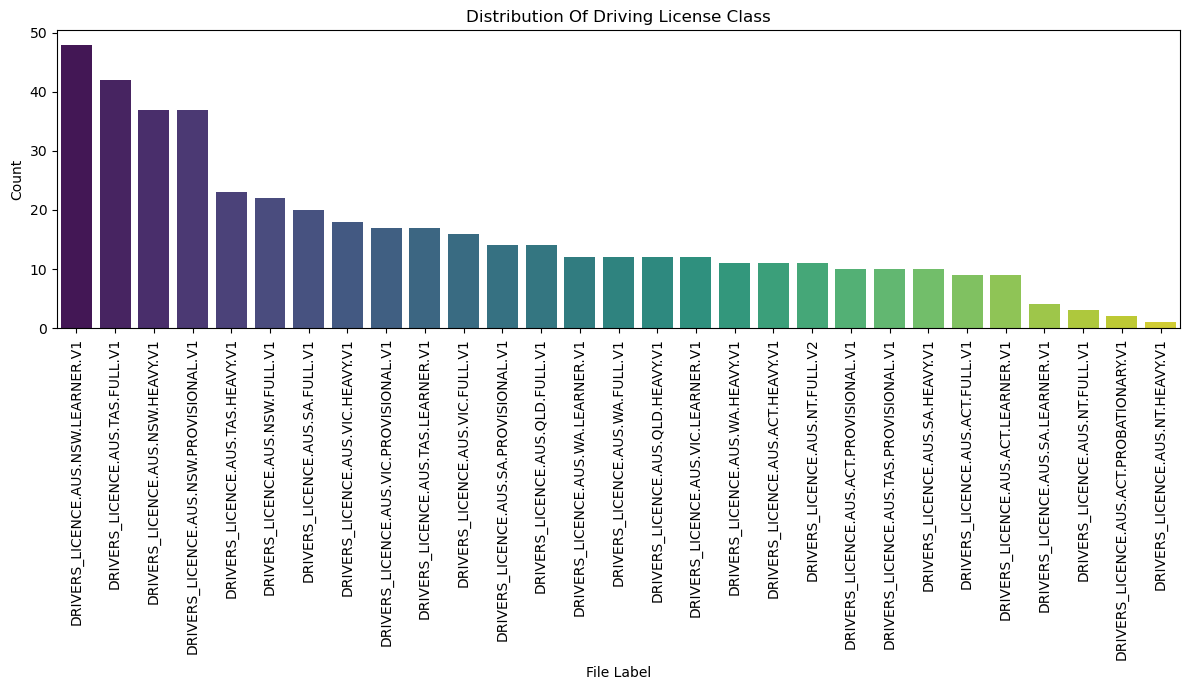

In [14]:

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution Of Driving License Class')
plt.xlabel('File Label')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate labels for better readability if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### We save the data into CSV file:

In [29]:
import pandas as pd

# Define the path to your CSV file
file_path = "NLP_OCR+dataset.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df.head())

# You can also check the data types and non-null values
print(df.info())


                                        file_name  \
0  027676a0-cbfa-4b24-b0e6-3b9fee058ce4-1_pt.json   
1  032539f6-1625-4c66-b766-4fff33b08bbc-1_pt.json   
2  041d62a4-9b23-4cc2-8094-8067e7b10f85-1_pt.json   
3  044eb0cd-e7d7-45b0-bbda-473ccbb0db81-1_pt.json   
4  047600b4-3912-4b0f-9fa5-027d1bfcbb4c-1_pt.json   

                        file_label  \
0  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
1  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
2  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
3  DRIVERS_LICENCE.AUS.ACT.FULL.V1   
4  DRIVERS_LICENCE.AUS.ACT.FULL.V1   

                                 pseudo_text_feature  
0  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  
1  DRIVER LICENCE\nACT\nAUSTRALIAN CAPITAL TERRIT...  
2  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  
3  DRIVER LICENCE\nAUSTRALIAN CAPITAL TERRITORY\n...  
4  DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITO...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 3 columns):
 #   Column       

In [30]:
df.iloc[0]["pseudo_text_feature"]

'DRIVER LICENCE ACT\nAUSTRALIAN CAPITAL TERRITORY\nJAMIESON Tiffany Mark 28 TTRNQXR CR HSWKDY ACT 6026\nTRALIAN\nDate of Birth\n19NOV1986\nLicence Expires 19NOV2026\nLicence No. 4784508\nClass C\nConditions S\nLijnin\nP275728621'

## Remove the document types with insufficient number of samples

The dataset currently includes specific classes with an insufficient number of samples, such as DRIVERS_LICENCE.AUS.SA.LEARNER.V1 (4 samples), DRIVERS_LICENCE.AUS.NT.FULL.V1 (3 samples), DRIVERS_LICENCE.AUS.ACT.PROBATIONARY.V1 (2 samples), and DRIVERS_LICENCE.AUS.NT.HEAVY.V1 (1 sample). Due to these extremely limited representations, these classes will be removed from the dataset before model training. This step is crucial to prevent overfitting, enhance model generalization, and ensure more reliable performance across the adequately represented categories.

In [31]:
# Count unique labels for 'file_label'
label_counts = df['file_label'].value_counts()
print("Unique label counts for 'file_label':")
print(label_counts)

Unique label counts for 'file_label':
file_label
DRIVERS_LICENCE.AUS.NSW.LEARNER.V1         48
DRIVERS_LICENCE.AUS.TAS.FULL.V1            42
DRIVERS_LICENCE.AUS.NSW.HEAVY.V1           37
DRIVERS_LICENCE.AUS.NSW.PROVISIONAL.V1     37
DRIVERS_LICENCE.AUS.TAS.HEAVY.V1           23
DRIVERS_LICENCE.AUS.NSW.FULL.V1            22
DRIVERS_LICENCE.AUS.SA.FULL.V1             20
DRIVERS_LICENCE.AUS.VIC.HEAVY.V1           18
DRIVERS_LICENCE.AUS.VIC.PROVISIONAL.V1     17
DRIVERS_LICENCE.AUS.TAS.LEARNER.V1         17
DRIVERS_LICENCE.AUS.VIC.FULL.V1            16
DRIVERS_LICENCE.AUS.SA.PROVISIONAL.V1      14
DRIVERS_LICENCE.AUS.QLD.FULL.V1            14
DRIVERS_LICENCE.AUS.WA.LEARNER.V1          12
DRIVERS_LICENCE.AUS.WA.FULL.V1             12
DRIVERS_LICENCE.AUS.QLD.HEAVY.V1           12
DRIVERS_LICENCE.AUS.VIC.LEARNER.V1         12
DRIVERS_LICENCE.AUS.WA.HEAVY.V1            11
DRIVERS_LICENCE.AUS.ACT.HEAVY.V1           11
DRIVERS_LICENCE.AUS.NT.FULL.V2             11
DRIVERS_LICENCE.AUS.ACT.PROVISI

In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'file_label' is the column name

# Count unique labels for 'file_label'
label_counts = df['file_label'].value_counts()
print("Unique label counts for 'file_label' (before filtering):")
print(label_counts)

# Filter out labels where the count is less than 6
filtered_label_counts = label_counts[label_counts > 12]

print("\nUnique label counts for 'file_label' (after filtering for counts >= 6):")
print(filtered_label_counts)

Unique label counts for 'file_label' (before filtering):
file_label
DRIVERS_LICENCE.AUS.NSW.LEARNER.V1         48
DRIVERS_LICENCE.AUS.TAS.FULL.V1            42
DRIVERS_LICENCE.AUS.NSW.HEAVY.V1           37
DRIVERS_LICENCE.AUS.NSW.PROVISIONAL.V1     37
DRIVERS_LICENCE.AUS.TAS.HEAVY.V1           23
DRIVERS_LICENCE.AUS.NSW.FULL.V1            22
DRIVERS_LICENCE.AUS.SA.FULL.V1             20
DRIVERS_LICENCE.AUS.VIC.HEAVY.V1           18
DRIVERS_LICENCE.AUS.VIC.PROVISIONAL.V1     17
DRIVERS_LICENCE.AUS.TAS.LEARNER.V1         17
DRIVERS_LICENCE.AUS.VIC.FULL.V1            16
DRIVERS_LICENCE.AUS.SA.PROVISIONAL.V1      14
DRIVERS_LICENCE.AUS.QLD.FULL.V1            14
DRIVERS_LICENCE.AUS.WA.LEARNER.V1          12
DRIVERS_LICENCE.AUS.WA.FULL.V1             12
DRIVERS_LICENCE.AUS.QLD.HEAVY.V1           12
DRIVERS_LICENCE.AUS.VIC.LEARNER.V1         12
DRIVERS_LICENCE.AUS.WA.HEAVY.V1            11
DRIVERS_LICENCE.AUS.ACT.HEAVY.V1           11
DRIVERS_LICENCE.AUS.NT.FULL.V2             11
DRIVERS_LICE

/tmp/ipykernel_20778/2268859036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_label_counts.index, y=filtered_label_counts.values, palette='viridis')


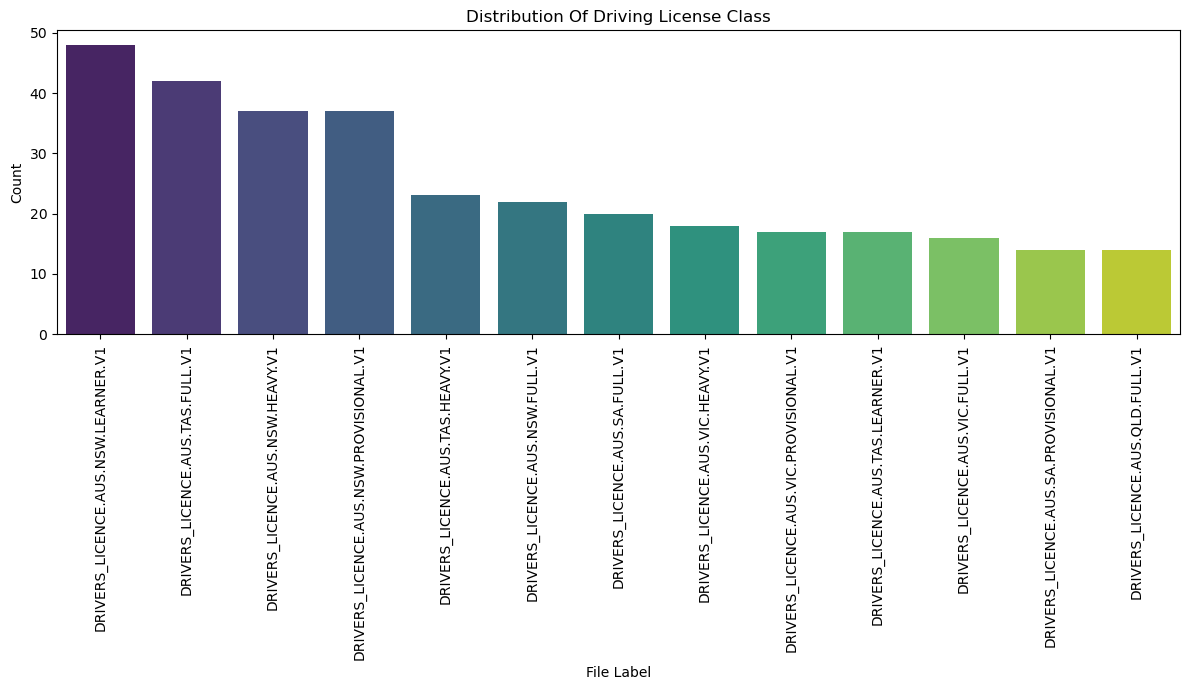

In [33]:

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=filtered_label_counts.index, y=filtered_label_counts.values, palette='viridis')
plt.title('Distribution Of Driving License Class')
plt.xlabel('File Label')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate labels for better readability if they are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Creating a clear_ground_dataset for all 13 target class we want to predict

In [35]:
import json

file_path = 'training_data_with_ground_truth_2.json'

with open(file_path, 'r') as f:
    data = json.load(f)
    print("File opened successfully!")



File opened successfully!


In [2]:
import json

# 1. List of keys you provided
keys = [
    "DRIVERS_LICENCE.AUS.NSW.LEARNER.V1",
    "DRIVERS_LICENCE.AUS.TAS.FULL.V1",
    "DRIVERS_LICENCE.AUS.NSW.HEAVY.V1",
    "DRIVERS_LICENCE.AUS.NSW.PROVISIONAL.V1",
    "DRIVERS_LICENCE.AUS.TAS.HEAVY.V1",
    "DRIVERS_LICENCE.AUS.NSW.FULL.V1",
    "DRIVERS_LICENCE.AUS.SA.FULL.V1",
    "DRIVERS_LICENCE.AUS.VIC.HEAVY.V1",
    "DRIVERS_LICENCE.AUS.VIC.PROVISIONAL.V1",
    "DRIVERS_LICENCE.AUS.TAS.LEARNER.V1",
    "DRIVERS_LICENCE.AUS.VIC.FULL.V1",
    "DRIVERS_LICENCE.AUS.SA.PROVISIONAL.V1",
    "DRIVERS_LICENCE.AUS.QLD.FULL.V1"
]

# ------------------------------------------------
# Scenario A: Create a brand-new JSON containing only these keys.
# Each key maps to an empty dict (you can change {} to None or any default value).
new_data = {key: {} for key in keys}

output_path = 'keys_only.json'
with open(output_path, 'w', encoding='utf-8') as out_f:
    json.dump(new_data, out_f, indent=2, ensure_ascii=False)
print(f"Created new JSON with only the specified keys at: {output_path}")

# ------------------------------------------------
# Scenario B: Filter an existing JSON file, keeping only these keys at top level.
# Suppose your original JSON is in 'original.json', structured as a dict at the top level.
# This will keep only entries where the top-level key is in `keys`.

#input_path = 'training_data_with_ground_truth_2.json'
input_path= "training_data_with_ground_truth_edit.json"
filtered_output_path = 'filtered_keys_edit.json'

try:
    with open(input_path, 'r', encoding='utf-8') as in_f:
        data = json.load(in_f)
except FileNotFoundError:
    print(f"File not found: {input_path}. Skipping filtering step.")
else:
    if isinstance(data, dict):
        filtered = {k: data[k] for k in keys if k in data}
        with open(filtered_output_path, 'w', encoding='utf-8') as out_f:
            json.dump(filtered, out_f, indent=2, ensure_ascii=False)
        print(f"Filtered JSON saved to: {filtered_output_path}")
    else:
        print(f"Expected a JSON object (dict) at top level in {input_path}, but got {type(data)}.")


Created new JSON with only the specified keys at: keys_only.json
Filtered JSON saved to: filtered_keys_edit.json


In [1]:
import json

file_path = 'filtered_keys.json'

with open(file_path, 'r') as f:
    data = json.load(f)
    print("File opened successfully!")


data

File opened successfully!


{'DRIVERS_LICENCE.AUS.NSW.LEARNER.V1': {'013c11b9-7bac-493a-8350-1cb8bbdaea79-1_pt.json': {'pseudo': 'Learner Driver Licence New South Wales, Australia\nFox Gonzalez WEAVER\nCard Number 5 610 827 648\n48 FHQ WCMEAPQJ LHQABHJ DAGZJBC NSW 4819\nLicence Na 40419631 Licence Cass C LRN\nDate of Birth 07 MAR 1983\nExpiry Date 17 DEC 2020',
   'ground_truth': {'name': 'Fox Gonzalez WEAVER',
    'address': '48 FHQ WCMEAPQJ LHQABHJ DAGZJBC NSW 4819',
    'dateOfBirth': '07/03/1983',
    'dateOfIssue': '',
    'dateOfExpiry': '17/12/2020',
    'licenceNumber': '40419631',
    'passportNumber': '',
    'cardNumber': '5610827648',
    'identityNumber': '',
    'non_pii_text': ['Learner Driver Licence New South Wales Australia',
     'Licence Na',
     'Licence Cass C LRN',
     'Date of Birth',
     'Expiry Date']}},
  '01b2b7df-771a-47c4-a92c-7d8b64d75ad1-1_pt.json': {'pseudo': 'Learner Driver Licence New South Wales. Australia 25 JAN 2027\nMcdaniel Logan RIVERA\n97 BOCSK ST JDXZUOYTA NSW 5041\n3

In [2]:
import json

file_path = 'filtered_keys.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# If top-level is a list
if isinstance(data, list):
    total_rows = len(data)

# If top-level is a dict where each value is another dict of records
elif isinstance(data, dict):
    total_rows = sum(
        len(v) if isinstance(v, dict) else 1     # count nested entries
        for v in data.values()
    )

else:
    total_rows = 1  # single object

print(f"Total rows: {total_rows}")

Total rows: 325


### Finally we display the final standardized dataset:

In [4]:
import json

# Load JSON data we clean
with open('filtered_keys_edit11 1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Determine structure and count entries
if isinstance(data, dict):
    # If top-level is dict, check if values are dicts (nested structure)
    total_count = 0
    nested_counts = {}
    for key, val in data.items():
        if isinstance(val, dict):
            count = len(val)
            nested_counts[key] = count
            total_count += count
        else:
            # If value not dict, treat as single entry or ignore based on context
            nested_counts[key] = 1
            total_count += 1

    print("Counts per top-level key:")
    for k, cnt in nested_counts.items():
        print(f"  {k}: {cnt}")
    print(f"Total entries across all keys: {total_count}")

elif isinstance(data, list):
    total_count = len(data)
    print(f"Top-level is a list with {total_count} entries.")
else:
    # Other types
    print(f"Top-level JSON is of type {type(data)}, count is 1.")

Counts per top-level key:
  DRIVERS_LICENCE.AUS.NSW.LEARNER.V1: 48
  DRIVERS_LICENCE.AUS.TAS.FULL.V1: 42
  DRIVERS_LICENCE.AUS.NSW.HEAVY.V1: 36
  DRIVERS_LICENCE.AUS.NSW.PROVISIONAL.V1: 36
  DRIVERS_LICENCE.AUS.TAS.HEAVY.V1: 23
  DRIVERS_LICENCE.AUS.NSW.FULL.V1: 22
  DRIVERS_LICENCE.AUS.SA.FULL.V1: 20
  DRIVERS_LICENCE.AUS.VIC.HEAVY.V1: 16
  DRIVERS_LICENCE.AUS.VIC.PROVISIONAL.V1: 15
  DRIVERS_LICENCE.AUS.TAS.LEARNER.V1: 17
  DRIVERS_LICENCE.AUS.VIC.FULL.V1: 16
  DRIVERS_LICENCE.AUS.SA.PROVISIONAL.V1: 14
  DRIVERS_LICENCE.AUS.QLD.FULL.V1: 14
Total entries across all keys: 319


/tmp/ipykernel_29065/1440399060.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap   = cm.get_cmap('tab20', len(df_counts))


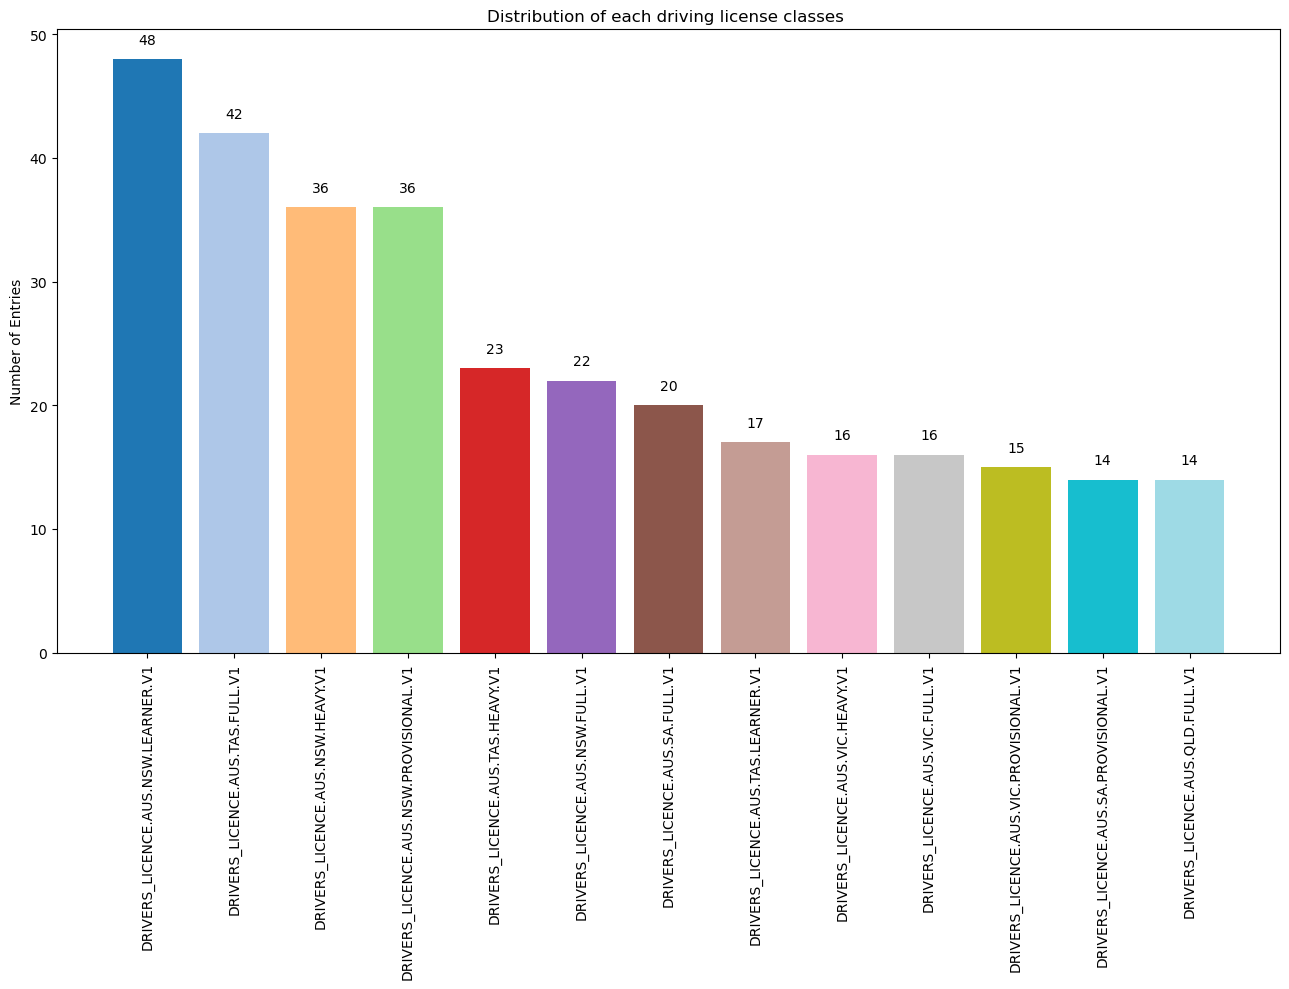

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_path = 'filtered_keys_edit11 1.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

rows = [(k, len(v) if isinstance(v, dict) else 1) for k, v in data.items()]
df_counts = (
    pd.DataFrame(rows, columns=['Document Type', 'Count'])
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

# Use a colormap to give each bar its own colour
cmap   = cm.get_cmap('tab20', len(df_counts))
colors = [cmap(i) for i in range(len(df_counts))]

fig, ax = plt.subplots(figsize=(13, 10))
bars = ax.bar(df_counts['Document Type'], df_counts['Count'], color=colors)
ax.set_ylabel('Number of Entries')
ax.set_title('Distribution of each driving license classes ')
plt.xticks(rotation=90)

# Annotate each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()